### Download the Kaggle fake news detection dataset (English)

In [ ]:
import gdown
url = "https://drive.google.com/uc?id=1Ajm-a_RwfVryBEQ4csOE8Jd7-l7wpufO&confirm=t"
output = "kaggle_fake_news_dataset.zip"
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1Ajm-a_RwfVryBEQ4csOE8Jd7-l7wpufO&confirm=t
To: /content/kaggle_fake_news_dataset.zip
100%|██████████| 43.0M/43.0M [00:00<00:00, 82.0MB/s]


'kaggle_fake_news_dataset.zip'

In [ ]:
!unzip 'kaggle_fake_news_dataset.zip'

Archive:  kaggle_fake_news_dataset.zip
  inflating: Fake.csv/Fake.csv       
  inflating: True.csv/True.csv       
  inflating: il_1140xN.1287758547_2nwc.png  


### Load CSV files

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random


In [ ]:
df_fake = pd.read_csv('Fake.csv/Fake.csv')
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
df_true = pd.read_csv('True.csv/True.csv')
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


### Remove news articles that are either too short or too long

In [ ]:
df_fake['length'] = df_fake['text'].apply(lambda x: len(x.strip().split(' ')))
df_true['length'] = df_true['text'].apply(lambda x: len(x.strip().split(' ')))

min(df_fake['length']), max(df_fake['length']), min(df_true['length']), max(df_true['length'])

(1, 8435, 1, 5174)

In [ ]:
fake_news = df_fake[(df_fake['length'] > 20) & (df_fake['length'] < 800)]['text'].values
true_news = df_true[(df_true['length'] > 20) & (df_true['length'] < 800)]['text'].values

fake_news.shape, true_news.shape

((20489,), (19384,))

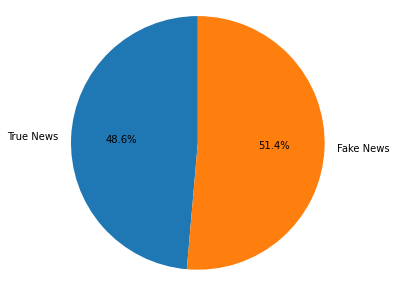

In [ ]:
fig = plt.figure(figsize=(5,5))
labels = ["True News", "Fake News"]
sizes = [len(true_news), len(fake_news)]
plt.pie(sizes, labels=labels, shadow=False, autopct="%1.1f%%", startangle=90)
plt.axis("Equal")
plt.show()

### Sample News Articles

In [ ]:

# print true news in green
print("\033[92m", true_news[random.randint(0,len(true_news)-1)])
print("\033[92m", true_news[random.randint(0,len(true_news)-1)])
print("\033[92m", true_news[random.randint(0,len(true_news)-1)])

# print fake news in red
print("\33[91m", fake_news[random.randint(0,len(fake_news)-1)])
print("\33[91m", fake_news[random.randint(0,len(fake_news)-1)])
print("\33[91m", fake_news[random.randint(0,len(fake_news)-1)])

 MADRID (Reuters) - Emergency services have attended to 38 people injured in police charges as officers stormed voting stations to stop a banned referendum on independence from Spain in the northeastern region of Catalonia, the Catalan emergency services said on Sunday. Most of those people sustained slight injuries and three suffered more serious injuries, the Catalan services said on Twitter. 
 HAVANA (Reuters) - Cuba took another step on Sunday toward the end of the Castro era, with millions of residents placing paper ballots in cardboard boxes for ward delegates to municipal assemblies. The vote comes the day after the first anniversary of revolutionary leader Fidel Castro s death and precedes another election early next year for provincial and national assembly deputies. The new national assembly, where 50 percent of the deputies must be ward delegates elected on Sunday, is expected on Feb. 24 to select a new president to replace Raul Castro, Fidel s 86-year-old younger brother, w

### Remove "(Reuters)" from the true news articles

In [ ]:
true_news_aug = []
for article in true_news:
  if '(Reuters) -' in article and article.index('(Reuters) -') < 50:
    i = article.index('(Reuters) -')+len('(Reuters) -')
    true_news_aug.append(article[i:].strip())
  else:
    true_news_aug.append(article)

In [ ]:
# print true news in green
print("\033[92m", true_news_aug[random.randint(0,len(true_news_aug)-1)])
print("\033[92m", true_news_aug[random.randint(0,len(true_news_aug)-1)])
print("\033[92m", true_news_aug[random.randint(0,len(true_news_aug)-1)])

# print fake news in red
print("\33[91m", fake_news[random.randint(0,len(fake_news)-1)])
print("\33[91m", fake_news[random.randint(0,len(fake_news)-1)])
print("\33[91m", fake_news[random.randint(0,len(fake_news)-1)])

 Three congressional committees are scuffling over a former British spy’s reports that are central to investigations into U.S. allegations that Russia tried to help Donald Trump’s 2016 presidential campaign, people involved in the inquiries said. The dossier assembled by former MI6 officer Christopher Steele outlined Russian financial and personal links to Trump’s campaign and associates. The Senate Intelligence Committee and special counsel Robert Mueller are looking into possible collusion between Russia and Trump’s campaign and Mueller’s investigators have met with Steele.  However, the Republican chairmen of the House Intelligence and Senate Judiciary committees are challenging the dossier’s credibility and one has implied that Russians may have played a role in its preparation, sources familiar with the inquiries said. The duel is not purely partisan. Senator Richard Burr, the Republican chairman of the Senate Intelligence Committee, and Mark Warner, the committee’s ranking Democr

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X = np.concatenate([true_news_aug, fake_news])
y = np.concatenate([[0]*len(true_news_aug), [1]*len(fake_news)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31898,), (7975,), (31898,), (7975,))

### Fine Tuning BERT

In [ ]:
!pip install -q -U "tensorflow-text==2.8.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.1/498.1 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.3/462.3 KB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 26.8 MB/s eta 0:00:00


In [ ]:
!pip install -q tf-models-official==2.7.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 KB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.1/352.1 KB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 KB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 46.8 MB/s eta 0:00:00


In [ ]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

tf.get_logger().setLevel('ERROR')

/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.4 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [ ]:
#@title Choose a BERT model to fine-tune

bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8'  #@param ["bert_en_uncased_L-12_H-768_A-12", "bert_en_cased_L-12_H-768_A-12", "bert_multi_cased_L-12_H-768_A-12", "small_bert/bert_en_uncased_L-2_H-128_A-2", "small_bert/bert_en_uncased_L-2_H-256_A-4", "small_bert/bert_en_uncased_L-2_H-512_A-8", "small_bert/bert_en_uncased_L-2_H-768_A-12", "small_bert/bert_en_uncased_L-4_H-128_A-2", "small_bert/bert_en_uncased_L-4_H-256_A-4", "small_bert/bert_en_uncased_L-4_H-512_A-8", "small_bert/bert_en_uncased_L-4_H-768_A-12", "small_bert/bert_en_uncased_L-6_H-128_A-2", "small_bert/bert_en_uncased_L-6_H-256_A-4", "small_bert/bert_en_uncased_L-6_H-512_A-8", "small_bert/bert_en_uncased_L-6_H-768_A-12", "small_bert/bert_en_uncased_L-8_H-128_A-2", "small_bert/bert_en_uncased_L-8_H-256_A-4", "small_bert/bert_en_uncased_L-8_H-512_A-8", "small_bert/bert_en_uncased_L-8_H-768_A-12", "small_bert/bert_en_uncased_L-10_H-128_A-2", "small_bert/bert_en_uncased_L-10_H-256_A-4", "small_bert/bert_en_uncased_L-10_H-512_A-8", "small_bert/bert_en_uncased_L-10_H-768_A-12", "small_bert/bert_en_uncased_L-12_H-128_A-2", "small_bert/bert_en_uncased_L-12_H-256_A-4", "small_bert/bert_en_uncased_L-12_H-512_A-8", "small_bert/bert_en_uncased_L-12_H-768_A-12", "albert_en_base", "electra_small", "electra_base", "experts_pubmed", "experts_wiki_books", "talking-heads_base"]

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [ ]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [ ]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)

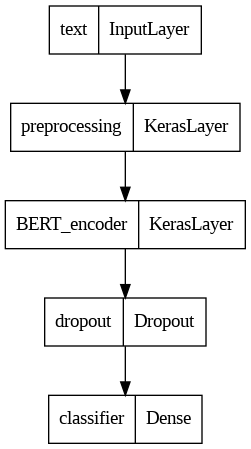

In [ ]:
classifier_model = build_classifier_model()
tf.keras.utils.plot_model(classifier_model)

In [ ]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()

In [ ]:
epochs = 4
steps_per_epoch = 100
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')


In [ ]:
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [ ]:
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(X_train, 
                               y_train,
                               validation_split=0.1,
                               epochs=epochs)

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Epoch 1/4
898/898 [==============================] - 250s 268ms/step - loss: 0.0652 - binary_accuracy: 0.9747 - val_loss: 0.0385 - val_binary_accuracy: 0.9868
Epoch 2/4
898/898 [==============================] - 241s 268ms/step - loss: 0.0348 - binary_accuracy: 0.9879 - val_loss: 0.0385 - val_binary_accuracy: 0.9868
Epoch 3/4
898/898 [==============================] - 240s 268ms/step - loss: 0.0347 - binary_accuracy: 0.9876 - val_loss: 0.0385 - val_binary_accuracy: 0.9868
Epoch 4/4
898/898 [==============================] - 241s 268ms/step - loss: 0.0338 - binary_accuracy: 0.9885 - val_loss: 0.0385 - val_binary_accuracy: 0.9868


### Evaluating the Model

In [ ]:
loss, accuracy = classifier_model.evaluate(X_test, y_test)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

250/250 [==============================] - 34s 134ms/step - loss: 0.0440 - binary_accuracy: 0.9857
Loss: 0.04396290332078934
Accuracy: 0.9857053160667419


In [ ]:
from sklearn.metrics import f1_score, roc_curve

y_pred = (classifier_model.predict(X_test)>0).astype(int)[:,0]
print("F1 Score :", f1_score(y_test, y_pred))


F1 Score : 0.9869256630556592


### AUC curve plot

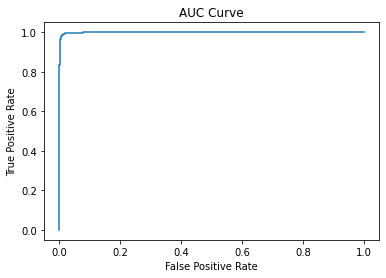

In [ ]:
#create AUC curve

y_pred_proba = classifier_model.predict(X_test)[:,0]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

plt.plot(fpr,tpr)
plt.title('AUC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Misclassified Articles

In [ ]:
misclassified = []
for i in range(len(y_pred)):
  if y_pred[i]!=y_test[i]:
    misclassified.append(i)

for ind in misclassified[:10]:
  print(X_test[ind])
  print('Predicted Label :', y_pred[ind])
  print('True Label :', y_test[ind])
  print()

State Department spokeswoman Heather Nauert did a great job of defending the U.S. move to pull out of a UN organization that has been connected to terrorist organizations hostile to Israel. Israel immediately praised the move by the Trump administration and announced they will follow:The U.S. will withdraw from United Nations Educational, Scientific and Cultural Organization (UNESCO), citing financial reasons and  anti-Israel bias. This decision was not taken lightly, and reflects U.S. concerns with mounting arrears at UNESCO, the need for fundamental reform in the organization, and continuing anti-Israel bias at UNESCO,  State Department spokeswoman Heather Nauert said in a statement Thursday.The U.S. withdrawal will take effect on Dec. 31. The U.S. will remain in the cultural organization as a non-member observer.UNESCO director-general Irina Bokova said in a statement that she wishes  to express profound regret  at the U.S.  decision.Nauert s statement did not include any examples o

## More Tests

In [ ]:
Extra_Tests = []
for i in range(len(X_test)):
  if y_test[i] == 1: # Fake News
    Extra_Tests.append('WASHINGTON (Reuters) - ' + X_test[i])

In [ ]:
extra_pred = (classifier_model.predict(Extra_Tests)>0).astype(int)[:,0]
sum(extra_pred), len(X_test), 100-100*sum(extra_pred)/len(X_test)

(3957, 7975, 50.38244514106583)

### Save Model

In [ ]:
classifier_model.save('bert_model')

In [ ]:
classifier_model_loaded = tf.keras.models.load_model(
  "bert_model",
  custom_objects={
    "AdamWeightDecay": optimizer
  }
)

In [ ]:
extra_pred = (classifier_model_loaded.predict(Extra_Tests)>0).astype(int)[:,0]
sum(extra_pred), len(X_test), 100-100*sum(extra_pred)/len(X_test)

(3957, 7975, 50.38244514106583)